<a href="https://colab.research.google.com/github/NadaAbdr/Mobile-Device-Usage-and-User-Behavior/blob/main/Mobile_Phone_Usage_Data_Analysis_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mobile Phone Usage Data Analysis Using Machine Learning**

In our time, the use of smartphones has become an essential thing that we cannot do without, but many people face the problem of excessive use of phones without realizing the amount of time they spend on them. This excessive use may affect their social life and mental health, such as poor eyesight due to focusing on screens for long periods, and it may also lead to weak social relationships and a feeling of isolation as users tend to immerse themselves in their phones instead of interacting with those around them.

To solve this problem, we will train a model that analyzes user behavior data on mobile phones then determines the level of usage (from light to heavy). When the user exceeds the upper limit of usage, it will allow him to realize the extent of his excessive use of the mobile phone. Thus, the user can decide to allocate appropriate breaks. This will contribute to promoting a healthy and psychological balance, and help improve social relationships and avoid isolation.


In [ ]:
from google.colab import files
uploaded = files.upload();

Saving user_behavior_dataset.csv to user_behavior_dataset.csv


In [ ]:
import pandas as pd
df = pd.read_csv("/content/user_behavior_dataset.csv")

#kaggle = https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset

In [ ]:
print('Head: \n',df.head())
print('\n-----------------------------------------------------\n')
print('Tail: \n',df.tail())

Head: 
    User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [ ]:

print(df['Device Model'].unique())

['Google Pixel 5' 'OnePlus 9' 'Xiaomi Mi 11' 'iPhone 12'
 'Samsung Galaxy S21']


In [ ]:
print(df['Operating System'].unique())

['Android' 'iOS']


In [ ]:
print(df['Gender'].unique())

['Male' 'Female']


# visualization

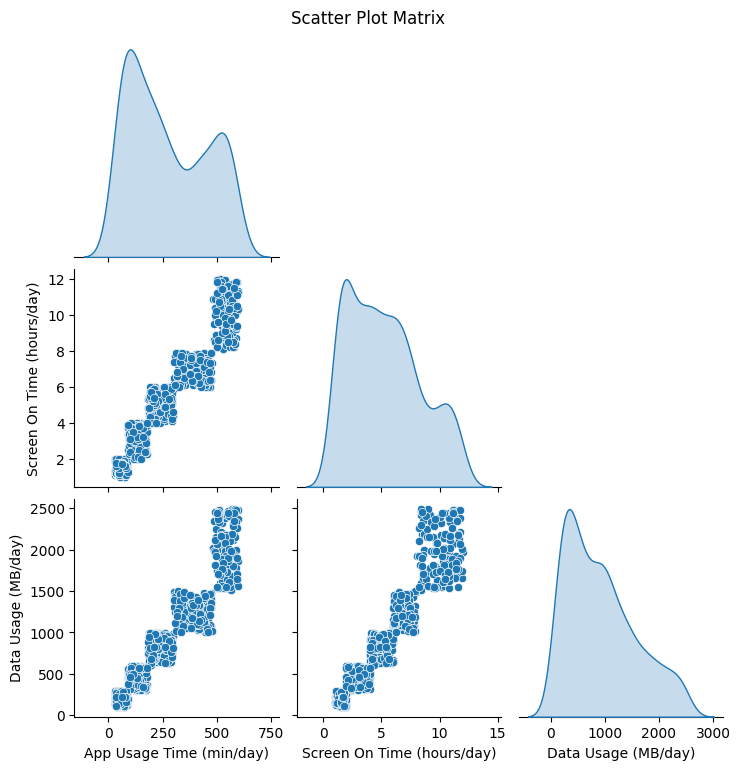

In [ ]:
# scatter plot matrix
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Data Usage (MB/day)']

# Creating a pairplot (scatter plot matrix)
sns.pairplot(df[selected_columns], diag_kind='kde', corner=True)
plt.suptitle('Scatter Plot Matrix ', y=1.02)
plt.show()

#pd.plotting.scatter_matrix(df)
#plt.show()

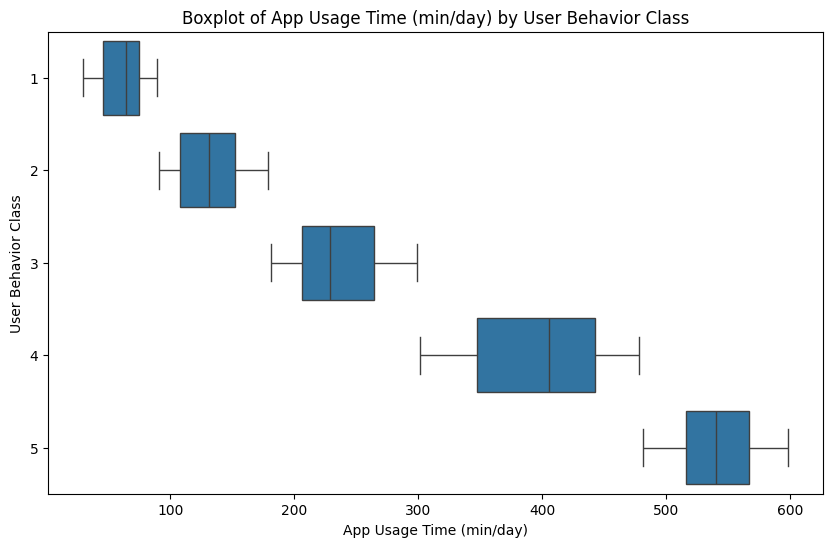

In [ ]:
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x='App Usage Time (min/day)', y='User Behavior Class', data=df, orient='h')
plt.title('Boxplot of App Usage Time (min/day) by User Behavior Class')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('User Behavior Class')
plt.show()

# correlation

In [ ]:
df1=df.loc[:,['App Usage Time (min/day)','Screen On Time (hours/day)','Data Usage (MB/day)','Battery Drain (mAh/day)','Number of Apps Installed','User Behavior Class']]
df1

,App Usage Time (min/day),Screen On Time (hours/day),Data Usage (MB/day),Battery Drain (mAh/day),Number of Apps Installed,User Behavior Class
0,393,6.4,1122,1872,67,4
1,268,4.7,944,1331,42,3
2,154,4.0,322,761,32,2
3,239,4.8,871,1676,56,3
4,187,4.3,988,1367,58,3
...,...,...,...,...,...,...
695,92,3.9,381,1082,26,2
696,316,6.8,1201,1965,68,4
697,99,3.1,457,942,22,2
698,62,1.7,224,431,13,1


In [ ]:
corr_matrix=df1.corr()

corr_matrix

,App Usage Time (min/day),Screen On Time (hours/day),Data Usage (MB/day),Battery Drain (mAh/day),Number of Apps Installed,User Behavior Class
App Usage Time (min/day),1.000000,0.950333,0.942308,0.956385,0.955253,0.970498
Screen On Time (hours/day),0.950333,1.000000,0.941322,0.948983,0.946975,0.964581
Data Usage (MB/day),0.942308,0.941322,1.000000,0.932276,0.934800,0.946734
Battery Drain (mAh/day),0.956385,0.948983,0.932276,1.000000,0.961853,0.978587
Number of Apps Installed,0.955253,0.946975,0.934800,0.961853,1.000000,0.981255
User Behavior Class,0.970498,0.964581,0.946734,0.978587,0.981255,1.000000


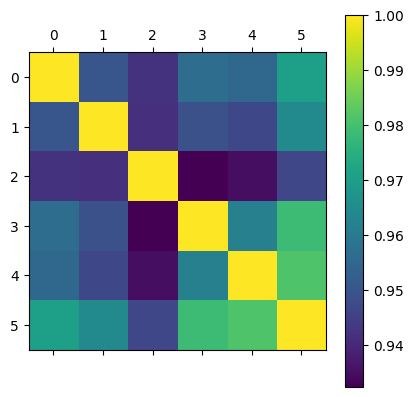

In [ ]:
plt.matshow(corr_matrix)
plt.colorbar()
plt.show()

In [ ]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,App Usage Time (min/day),Screen On Time (hours/day),Data Usage (MB/day),Battery Drain (mAh/day),Number of Apps Installed,User Behavior Class
App Usage Time (min/day),1.000000,0.950333,0.942308,0.956385,0.955253,0.970498
Screen On Time (hours/day),0.950333,1.000000,0.941322,0.948983,0.946975,0.964581
Data Usage (MB/day),0.942308,0.941322,1.000000,0.932276,0.934800,0.946734
Battery Drain (mAh/day),0.956385,0.948983,0.932276,1.000000,0.961853,0.978587
Number of Apps Installed,0.955253,0.946975,0.934800,0.961853,1.000000,0.981255
User Behavior Class,0.970498,0.964581,0.946734,0.978587,0.981255,1.000000


# PHASE 2

Data Preprocessing


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
# Load Iris dataset from Scikit-learn
from sklearn.datasets import load_iris


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df is already loaded with your dataset
X = df.drop('User Behavior Class', axis=1)
y = df["User Behavior Class"]

# Encoding categorical columns
le = LabelEncoder()
df['Device Model'] = le.fit_transform(df['Device Model'])
df['Operating System'] = le.fit_transform(df['Operating System'])
df['Gender'] = le.fit_transform(df['Gender'])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Printing the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# If you want to work with the Iris dataset, separate it like this
from sklearn.datasets import load_iris

iris = load_iris()
feature_names = iris.feature_names
X_data = pd.DataFrame(iris.data, columns=feature_names)
y_data = iris.target



Shape of X_train: (469, 10)
Shape of X_test: (231, 10)
Shape of y_train: (469,)
Shape of y_test: (231,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

# Create input and output features
feature_names = load_iris().feature_names
X_data = pd.DataFrame(load_iris().data, columns=feature_names)
y_data = load_iris().target


Train/test split


Feature Selection

### *Random Forest Classifier *

*testing - random forest classifier*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RFC=RandomForestClassifier()
RFC.fit(X_train, y_train)
Predictions=RFC.predict(X_test)
print("p:",Predictions)
print("no. of pre", Predictions.size)


accuracy = accuracy_score(y_test, Predictions)
print('The accuracy of classifier with full features: {:.2f}'.format(accuracy))

print('The accuracy of classifier with full features: {:.2f}'.format(accuracy))

ValueError: could not convert string to float: 'Xiaomi Mi 11'

### **logistic regression**

In [ ]:
import numpy
from sklearn import linear_model
from sklearn.metrics import accuracy_score

logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)
predicted = logr.predict(X_train)

print("p:",Predictions)
print("no. of pre", Predictions.size)

print('The accuracy of classifier with full features: {:.2f}'.format(accuracy))

p: [4 1 1 2 3 2 2 1 4 3 1 1 2 1 3 4 5 1 3 2 5 4 3 4 4 2 3 5 2 5 1 3 1 3 4 5 5
 1 1 2 3 4 1 3 2 5 3 3 1 3 2 2 2 1 5 5 3 1 4 2 3 2 1 2 5 2 5 1 5 5 1 2 3 2
 3 2 5 4 4 4 2 1 4 3 4 4 5 3 3 1 1 4 2 3 4 2 2 1 3 5 3 3 1 1 3 4 5 1 4 4 5
 4 4 3 3 2 4 3 4 3 3 4 5 4 5 2 3 5 4 5 3 2 1 3 2 3 5 2 1 2 4 3 4 2 1 4 4 5
 1 1 1 1 3 4 4 1 4 4 5 3 5 5 1 4 2 5 3 5 3 1 4 1 5 4 3 1 4 1 5 1 3 4 2 4 1
 3 3 1 5 4 3 3 4 1 4 5 3 4 2 2 1 1 4 1 3 3 1 3 3 4 5 3 1 1 3 1 5 1 1 1 3 5
 3 3 5 5 1 5 5 3 5]
no. of pre 231
The accuracy of classifier with full features: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Tree Module**


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
 # Creating the classifier object
clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=42, max_depth=3, min_samples_leaf=5)

# Performing training
clf_gini.fit(X_train, y_train)
predicted = clf_gini.predict(X_train)

print("p:",predicted)
print("no. of pre", predicted.size)

print('The accuracy of classifier with full features: {:.2f}'.format(accuracy))

p: [3 2 4 1 4 3 4 4 5 2 5 4 1 3 5 4 1 1 1 3 3 1 1 2 2 5 5 1 5 3 2 4 3 3 5 3 2
 5 2 5 3 5 3 1 4 4 4 3 5 1 1 2 1 5 2 4 5 1 2 5 4 3 3 5 4 3 3 1 1 3 1 4 1 4
 1 4 5 2 4 2 3 2 5 5 2 3 3 3 2 2 4 4 3 5 2 2 2 1 4 2 2 2 5 2 5 3 3 5 2 1 4
 5 5 3 2 5 4 1 5 3 4 1 3 4 4 4 5 1 2 2 3 1 4 2 3 5 1 2 5 5 2 4 5 1 2 1 2 5
 2 1 3 1 3 3 3 1 3 5 3 5 4 4 1 4 5 4 5 4 4 4 1 5 3 2 5 4 4 4 2 2 4 2 1 2 3
 2 2 3 3 4 4 3 3 4 2 2 2 2 2 3 4 3 4 3 2 2 2 1 2 4 5 2 2 1 5 5 2 3 4 4 5 4
 1 2 2 5 2 5 2 1 2 4 5 4 1 2 5 4 2 2 5 1 4 3 3 3 3 3 3 4 3 1 3 4 1 1 5 4 2
 4 5 1 1 4 1 2 2 3 3 4 5 3 5 1 5 5 1 2 5 5 4 4 3 5 5 1 1 2 1 2 3 2 4 4 3 2
 2 5 4 5 2 2 5 5 3 3 3 5 3 5 2 2 2 5 1 1 3 4 1 2 2 5 4 2 1 4 5 3 4 5 2 4 2
 2 3 1 5 2 2 2 4 4 1 1 5 5 4 5 1 2 5 2 5 3 1 3 1 5 2 5 2 3 5 1 5 5 2 5 5 2
 3 4 4 3 5 1 5 2 4 4 4 3 1 3 1 2 1 4 2 1 1 4 2 1 2 4 2 1 3 2 4 1 1 2 3 1 2
 5 4 5 3 2 2 5 3 1 3 4 5 3 1 4 1 2 5 5 1 4 1 5 4 2 1 1 4 3 4 3 4 5 5 2 2 1
 3 1 4 3 2 3 3 2 5 4 3 5 1 1 3 2 4 5 2 2 5 2 4 2 2]
no. of pre 469
The accuracy of classifier wit

### **Cross-validation** - Random Forest Classifier

In [ ]:
#Cross validation (attempt 1)
from sklearn.model_selection import cross_val_score
from sklearn import svm

# clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(RFC, X_train, y_train,scoring = "accuracy", cv=5)
for item in scores:
  print(item)
# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.9893617021276596
1.0
1.0
1.0
0.989247311827957


### **Cross-validation** - Random Forest Classifier

In [ ]:
#Cross validation (attempt 1)
from sklearn.model_selection import cross_val_score
from sklearn import svm

print("----------- recall_macro ")

recall_macro_RFC = cross_val_score(RFC, X_train, y_train,scoring = "recall_macro", cv=5)

print("Mean of recall - Random Forest Classifier " , recall_macro_RFC.mean())

print("----------- precision_macro ")
precision_macro_RFC = cross_val_score(RFC, X_train, y_train,scoring = "precision_macro", cv=5)


print("Mean of precision - Random Forest Classifier: " , precision_macro_RFC.mean())

print("----------- accuracy ")
accuracy_RFC = cross_val_score(RFC, X_train, y_train,scoring = "accuracy", cv=5)
print("Mean of accuracy - Random Forest Classifier " , accuracy_RFC.mean())

----------- recall_macro 
Mean of recall - Random Forest Classifier  1.0
----------- precision_macro 
Mean of precision - Random Forest Classifier:  1.0
----------- accuracy 
Mean of accuracy - Random Forest Classifier  1.0


### **Cross-validation** - Tree Algorithm


### ***GINI Classification***

In [ ]:
#Cross validation (attempt 1)
from sklearn.model_selection import cross_val_score
from sklearn import svm

# clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf_gini, X_train, y_train,scoring = "accuracy", cv=5)
for item in scores:
  print(item)
# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


In [ ]:
#Cross validation (attempt 1)
from sklearn.model_selection import cross_val_score
from sklearn import svm

print("----------- recall_macro ")

recall_macro_clf_gini = cross_val_score(clf_gini, X_train, y_train,scoring = "recall_macro", cv=5)

print("Mean of recall - GINI Classification: " , recall_macro_clf_gini.mean())

print("----------- precision_macro ")
precision_macro_clf_gini = cross_val_score(clf_gini, X_train, y_train,scoring = "precision_macro", cv=5)


print("Mean of precision - GINI Classification: " , precision_macro_clf_gini.mean())

print("----------- accuracy ")
accuracy_clf_gini = cross_val_score(clf_gini, X_train, y_train,scoring = "accuracy", cv=5)
print("Mean of accuracy - GINI Classification: " , accuracy_clf_gini.mean())

----------- recall_macro 
Mean of recall - GINI Classification:  0.9960765550239234
----------- precision_macro 
Mean of precision - GINI Classification:  0.9956470588235294
----------- accuracy 
Mean of accuracy - GINI Classification:  0.9957218027911233


### **Cross-validation** - Logistic Regression


In [ ]:
#Cross validation (attempt 1)
from sklearn.model_selection import cross_val_score
from sklearn import svm

# clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(logr, X_train, y_train,scoring = "accuracy", cv=5)
for item in scores:
  print(item)
# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.5531914893617021
0.723404255319149
0.6170212765957447
0.7021276595744681
0.6774193548387096


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
#Cross validation (attempt 1)
from sklearn.model_selection import cross_val_score
from sklearn import svm

print("----------- recall_macro ")

recall_macro_logr = cross_val_score(logr, X_train, y_train,scoring = "recall_macro", cv=5)

print("Mean of recall - Logistic Regression: " , recall_macro_logr.mean())

print("----------- precision_macro ")
precision_macro_logr = cross_val_score(logr, X_train, y_train,scoring = "precision_macro", cv=5)


print("Mean of precision - Logistic Regression: " , precision_macro_logr.mean())

print("----------- accuracy ")
accuracy_logr = cross_val_score(logr, X_train, y_train,scoring = "accuracy", cv=5)
print("Mean of accuracy - Logistic Regression: " , accuracy_logr.mean())

# clf = svm.SVC(kernel='linear', C=1, random_state=42)

# clf = svm.SVC(kernel='linear', C=1, random_state=42)

# print("----------- confusion_matrix ")
# scores2 = cross_val_score(logr, X_train, y_train,scoring = "confusion_matrix", cv=5)

# for item in scores2:
#   print(item)
# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


----------- recall_macro 
Mean of recall - Logistic Regression:  0.6501602952393772
----------- precision_macro 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean of precision - Logistic Regression:  0.6728352399944472
----------- accuracy 
Mean of accuracy - Logistic Regression:  0.6546328071379548


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

### **Cross Validation - Confusion Matrix **

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(RFC, X_train, y_train, cv=10)

confusion_matrix(y_train, y_train_pred)


array([[ 83,   0,   0,   0,   0],
       [  0, 112,   0,   0,   0],
       [  0,   0,  87,   0,   0],
       [  0,   0,   0,  92,   0],
       [  0,   0,   0,   0,  95]])

### **Compare between modules**

<function matplotlib.pyplot.show(close=None, block=None)>

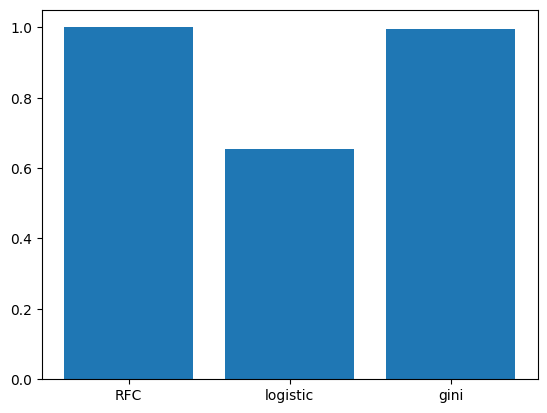

In [ ]:
classifier = ["RFC", "logistic", "gini"]
accuracy = [ accuracy_RFC.mean(), accuracy_logr.mean(), accuracy_clf_gini.mean()]
plt.bar(classifier, accuracy)
plt.show